In [146]:
import numpy as np
import math
import matplotlib.pyplot as plt
from save_csv import results_to_csv
from sklearn import svm

MNIST_VALIDATION_SET_SIZE = 10000
GLOBAL_SEED = 2302
TRAINING_SEED = 3012
np.random.seed(GLOBAL_SEED)

In [147]:
def partition(dataset, training_set, validation_set, validation_set_size):
    num_of_points = len(dataset["training_data"])
    indices = np.random.permutation(num_of_points) #shuffle the indices to ensure we shuffle the training data and the training labels in unison
    shuffled_training_data = dataset["training_data"][indices]
    shuffled_training_labels = dataset["training_labels"][indices]
    training_set["training_data"] = shuffled_training_data[validation_set_size :]
    training_set["training_labels"] = shuffled_training_labels[validation_set_size :]

    validation_set["training_data"] = shuffled_training_data[0 : validation_set_size]
    validation_set["training_labels"] = shuffled_training_labels[0 : validation_set_size]

In [148]:
def evaluate(true_labels, predicted_labels):
    n = len(true_labels)
    match_count = 0
    for i in range(n):
        if true_labels[i] == predicted_labels[i]:
            match_count += 1
    return match_count / n

Partitioning mnist data into a training set and a validation set

In [149]:
mnist_data = np.load("../data/mnist-data.npz")
mnist_validation_set = {}
mnist_training_set = {}
partition(mnist_data, mnist_training_set, mnist_validation_set, MNIST_VALIDATION_SET_SIZE)
print(mnist_training_set["training_data"].shape)
print(mnist_training_set["training_labels"].shape)

(50000, 1, 28, 28)
(50000,)


Partitioning spam data into a training set and a validation set

In [150]:
spam_data = np.load("../data/spam-data.npz")
spam_validation_set_size = math.floor(len(spam_data["training_data"]) * 0.2)
spam_validation_set = {}
spam_training_set = {}
partition(spam_data, spam_training_set, spam_validation_set, spam_validation_set_size)

4a: Training mnist classifier

(100, 1, 28, 28)
(100, 784)
(200, 1, 28, 28)
(200, 784)
(500, 1, 28, 28)
(500, 784)
(1000, 1, 28, 28)
(1000, 784)


c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

(2000, 1, 28, 28)
(2000, 784)


c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(5000, 1, 28, 28)
(5000, 784)


c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(10000, 1, 28, 28)
(10000, 784)


c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[1.0, 1.0, 1.0, 1.0, 1.0, 0.9848, 0.9462]
[0.6757, 0.7576, 0.8108, 0.8211, 0.8152, 0.8409, 0.8589]


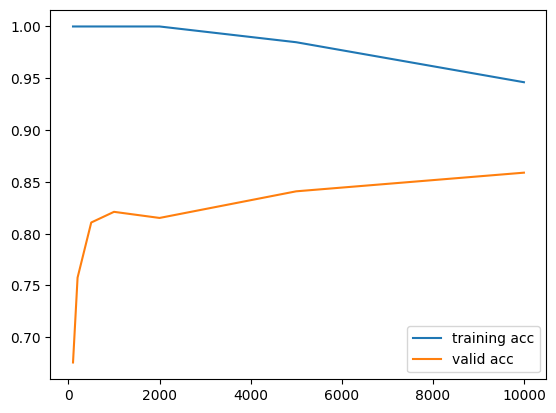

In [151]:

num_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
# num_samples = [100, 200, 500, 1000, 2000, 5000]
training_accuracies = []
validation_accuracies = []
start = 0
for num in num_samples:
    #mnist_classifier = svm.SVC(kernel='linear', random_state=323)
    mnist_classifier = svm.LinearSVC(random_state=323)
    mnist_training_subset = mnist_training_set["training_data"][0 : num]
    print(mnist_training_subset.shape)
    flattened_mnist_training_subset = mnist_training_subset.reshape(mnist_training_subset.shape[0], -1)
    print(flattened_mnist_training_subset.shape)
    mnist_labels_subset = mnist_training_set["training_labels"][0 : num]
    mnist_classifier.fit(flattened_mnist_training_subset, mnist_labels_subset)
    validated_value = mnist_classifier.predict(mnist_validation_set["training_data"].reshape(mnist_validation_set["training_data"].shape[0], -1))
    validation_accuracy = evaluate(mnist_validation_set["training_labels"], validated_value)
    training_predicted_value = mnist_classifier.predict(flattened_mnist_training_subset)
    training_accuracy = evaluate(mnist_labels_subset, training_predicted_value)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    start = num

print(training_accuracies)
print(validation_accuracies)
plt.plot(num_samples, training_accuracies, label="training acc")
plt.plot(num_samples, validation_accuracies, label="valid acc")
plt.legend()
plt.show()

4b: Training spam dataset

(100, 35)
(200, 35)
(500, 35)
(1000, 35)
(2000, 35)
(3337, 35)
[0.93, 0.88, 0.854, 0.817, 0.805, 0.8040155828588552]
[0.802158273381295, 0.8165467625899281, 0.842925659472422, 0.8309352517985612, 0.8285371702637889, 0.8309352517985612]


c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\

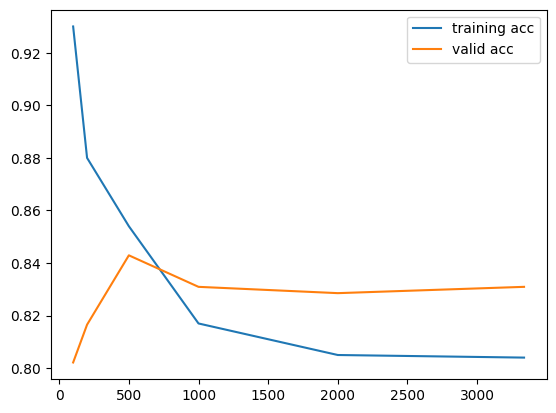

In [152]:
num_samples = [100, 200, 500, 1000, 2000, spam_training_set["training_data"].shape[0]]
training_accuracies = []
validation_accuracies = []
start = 0
for num in num_samples:
    # spam_classifier = svm.SVC(kernel='linear', random_state=323)
    spam_classifier = svm.LinearSVC(random_state=TRAINING_SEED)
    spam_training_subset = spam_training_set["training_data"][0 : num]
    spam_training_labels_subset = spam_training_set["training_labels"][0 : num]
    print(spam_training_subset.shape)
    spam_classifier.fit(spam_training_subset, spam_training_labels_subset)
    validated_value = spam_classifier.predict(spam_validation_set["training_data"])
    validation_accuracy = evaluate(spam_validation_set["training_labels"], validated_value)
    training_predicted_value = spam_classifier.predict(spam_training_subset)
    training_accuracy = evaluate(spam_training_labels_subset, training_predicted_value)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    start = num

print(training_accuracies)
print(validation_accuracies)
plt.plot(num_samples, training_accuracies, label="training acc")
plt.plot(num_samples, validation_accuracies, label="valid acc")
plt.legend()
plt.show()

Question 5

c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-pa

[0.8738, 0.8545, 0.8492, 0.8498, 0.8424, 0.8274, 0.8274, 0.8274]


c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


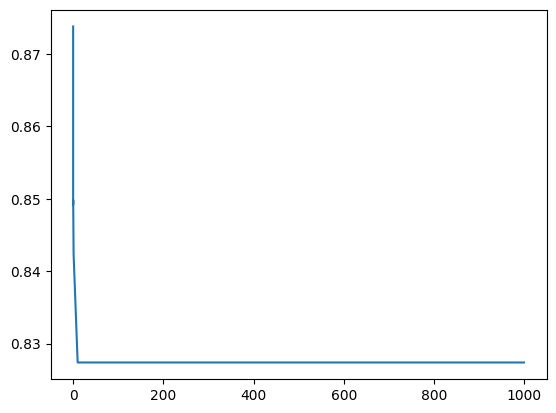

In [153]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
num_of_samples = 10001
mnist_training_subset = mnist_training_set["training_data"][0 : num_of_samples]
flattened_mnist_training_subset = mnist_training_subset.reshape(mnist_training_subset.shape[0], -1)
mnist_labels_subset = mnist_training_set["training_labels"][0 : num_of_samples]
validation_accuracies = []
for c in c_values:
    # mnist_classifier = svm.SVC(kernel='linear', random_state=TRAINING_SEED, C=c)
    mnist_classifier = svm.LinearSVC(random_state=TRAINING_SEED, C=c)
    mnist_classifier.fit(flattened_mnist_training_subset, mnist_labels_subset)
    predicted_value = mnist_classifier.predict(mnist_validation_set["training_data"].reshape(mnist_validation_set["training_data"].shape[0], -1))
    validation_acc = evaluate(mnist_validation_set["training_labels"], predicted_value)
    validation_accuracies.append(validation_acc)

print(validation_accuracies)
plt.plot(c_values, validation_accuracies)

Question 6

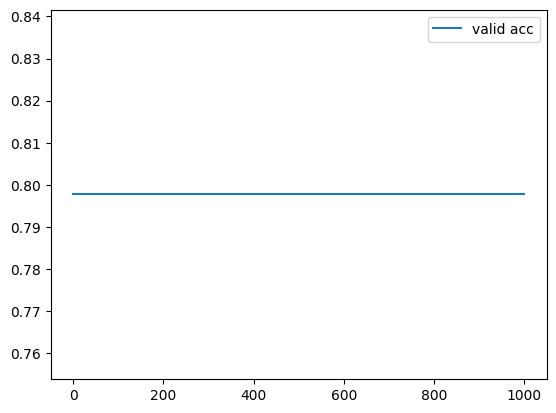

In [154]:
k = 5
valid_accuracies = []
for c in c_values:
    num_of_points = len(spam_training_set["training_data"])
    subset_size = math.ceil(num_of_points / k)
    # indices = np.random.permutation(num_of_points) #shuffle the indices to ensure we shuffle the training data and the training labels in unison
    # shuffled_training_data = spam_data["training_data"][indices]
    # shuffled_training_labels = spam_data["training_labels"][indices]
    training_subset = {}
    validating_subset = {}
    subsets = []
    sum_accuracies = 0
    start = 0
    for i in range(k):
        validating_subset["training_data"] = spam_training_set["training_data"][start : start + subset_size]
        validating_subset["training_labels"] = spam_training_set["training_labels"][start : start + subset_size]

        temp1 = spam_training_set["training_data"][ : start]
        temp2 = spam_training_set["training_data"][start + subset_size : ]

        temp3 = spam_training_set["training_labels"][ : start]
        temp4 = spam_training_set["training_labels"][start + subset_size : ]
        
        training_subset["training_data"] = np.concatenate((temp1, temp2))
        training_subset["training_labels"] = np.concatenate((temp3, temp4))

        spam_classifier = svm.SVC(kernel="linear", random_state=TRAINING_SEED, C=c)
        spam_classifier.fit(training_subset["training_data"], training_subset["training_labels"])
        validation_predicted_value = spam_classifier.predict(validating_subset["training_data"])
        valid_acc = evaluate(validating_subset["training_labels"], validation_predicted_value)
        sum_accuracies += valid_acc
        start = start + subset_size
    
    valid_accuracies.append(sum_accuracies / k)


plt.plot(c_values, valid_accuracies, label="valid acc")
plt.legend()
plt.show()



Question 7
Training a MNIST classifier

In [155]:
mnist_classifier = svm.LinearSVC(random_state=TRAINING_SEED, C=0.0001)
flattened_mnist_training_set = mnist_training_set["training_data"].reshape(mnist_training_set["training_data"].shape[0], -1)
mnist_classifier.fit(flattened_mnist_training_set, mnist_training_set["training_labels"])
y_pred = mnist_classifier.predict(mnist_data["test_data"].reshape(mnist_data["test_data"].shape[0], -1))
print(y_pred)
results_to_csv(y_pred, "mnist_test.csv")

c:\Users\tkthi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KeyboardInterrupt: 

Question 7 Training a SPAM classifier

In [ ]:
spam_classifier = mnist_classifier = svm.LinearSVC(random_state=TRAINING_SEED, C=0.0001)
spam_classifier.fit(spam_data["training_data"], spam_data["training_labels"])
y_pred = spam_classifier.predict(spam_data["test_data"])
results_to_csv(y_pred, "spam_test.csv")
